<a href="https://colab.research.google.com/github/tasmia-rahman2002/codealpha_tasks/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Importing the necessary libraries**

In [33]:
! pip install -U kaleido

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

**Data pre-processing**

In [35]:
#Loading data from CSV file
titanic_dataset = pd.read_csv('/content/train.csv')

In [36]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
#Total rows and columns
titanic_dataset.shape

(891, 12)

In [38]:
#Extracting info from dataset
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
#Checking the number of missing values in each Column
titanic_dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Addressing missing column**

In [40]:
#Majority of the values in the "cabin" column is missing. So dropping it.
titanic_dataset = titanic_dataset.drop(columns='Cabin', axis=1)
  # Axis = 1, as its a column. For row value is ->0.

In [41]:
#Replacing the missing values of the "Age" column with mean value
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace=True)

<ipython-input-41-faf483aed958>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace=True)


In [42]:
#Embarked column is categorical. So, can't fill it up with mean values. Filling up with most frequent values.
#Finding the mode value
print(titanic_dataset['Embarked'].mode())
print(titanic_dataset['Embarked'].mode()[0])
# Replacing the missing values in "Embarked" column with mode value.
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace=True)

0    S
Name: Embarked, dtype: object
S


<ipython-input-42-903354192ec5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace=True)


In [43]:
#Checking if we havw anymore missing values
titanic_dataset.isnull(). sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Data Analysis**

In [44]:
#Statistical data analysis
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
# Total Number of People survived and not survived
titanic_dataset['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [46]:
titanic_dataset['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [47]:
titanic_dataset['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


**Data Visualization**

In [48]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

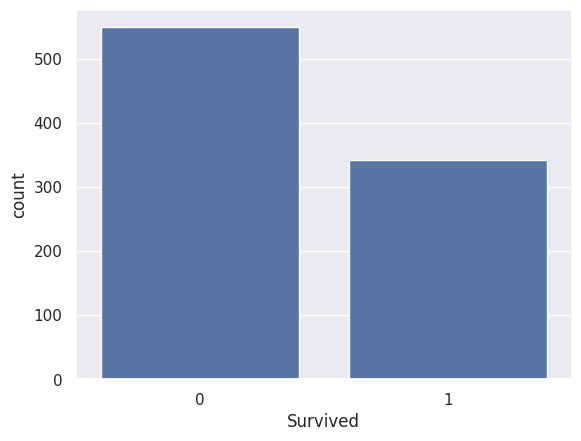

In [49]:
# Count plot for the "Survived" column
sns.countplot(x='Survived', data=titanic_dataset)

<Axes: xlabel='Sex', ylabel='count'>

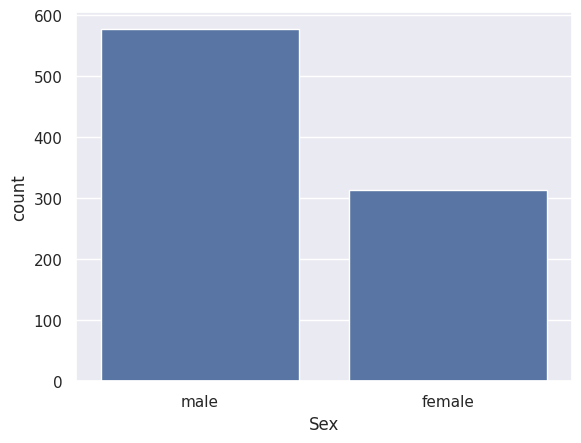

In [50]:
# Count plot for the "Sex" column
sns.countplot(x='Sex', data=titanic_dataset)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sex', ylabel='count'>

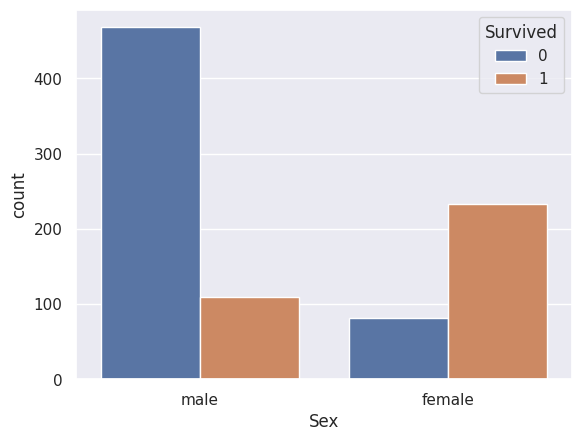

In [51]:
#Number of survivors based on "Gender"
sns.countplot(x='Sex', hue='Survived', data=titanic_dataset)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Pclass', ylabel='count'>

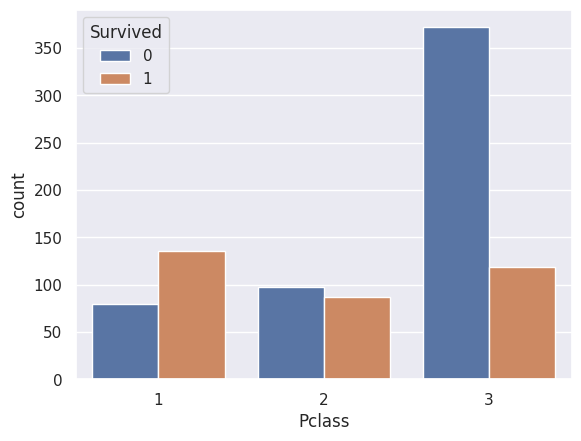

In [52]:
#Number of survivors based on "Pclass"
sns.countplot(x='Pclass', hue='Survived', data=titanic_dataset)

**Encoding Categorical Columns**

In [53]:
titanic_dataset['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [54]:
titanic_dataset['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [55]:
#Converting the categorical columns
titanic_dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<ipython-input-55-40cca13c2461>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [56]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Splitting features and target**

In [57]:
X = titanic_dataset.drop(columns = ['PassengerId','Ticket','Name','Survived'],axis=1)
Y = titanic_dataset['Survived']
print (Y)
print (X)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


**Spliting Data into train and test data**

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=3)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (668, 7) (223, 7)


**Model Training and Evaluation**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score:  0.7713004484304933


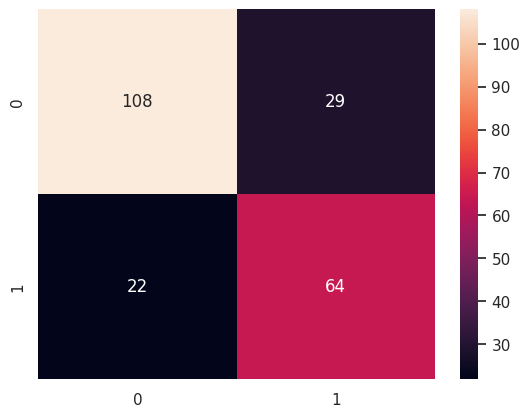

In [60]:
#Logistic Regression
model = LogisticRegression()

model.fit(X_train, Y_train)
print('Score: ',model.score(X_test,Y_test))
modpred = model.predict(X_test)

cfm = confusion_matrix(Y_test, modpred)
sns.heatmap(cfm, annot=True, fmt="d")  #  fmt="d" to display as integers
plt.show()

Score: 0.7937219730941704


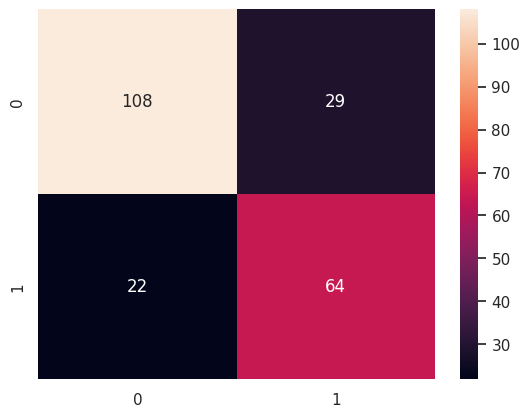

In [61]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
print('Score:',rfc.score(X_test,Y_test))
rfcpred = model.predict(X_test)
cfm = confusion_matrix(Y_test, rfcpred)
sns.heatmap(cfm, annot=True, fmt="d")  #  fmt="d" to display as integers
plt.show()

Decision Tree Score: 0.7713004484304933


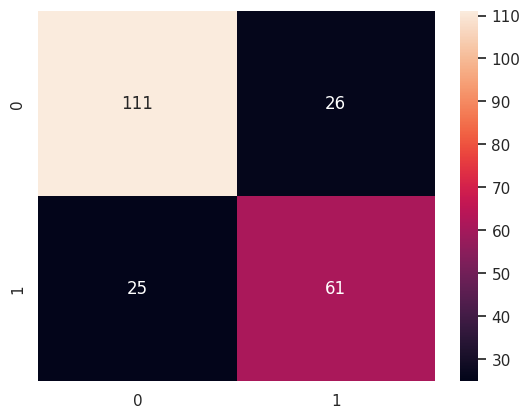

In [62]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

print('Decision Tree Score:', dtc.score(X_test, Y_test))

dtcpred = dtc.predict(X_test)

cfm = confusion_matrix(Y_test, dtcpred)
sns.heatmap(cfm, annot=True, fmt="d")
plt.show()


SVM Score: 0.6278026905829597


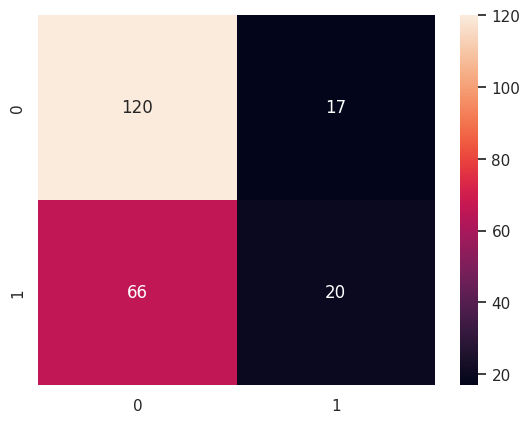

In [63]:
#Support Vector Classifier
svc = SVC()
svc.fit(X_train, Y_train)
print('SVM Score:', svc.score(X_test, Y_test))

svcpred = svc.predict(X_test)

cfm = confusion_matrix(Y_test, svcpred)
sns.heatmap(cfm, annot=True, fmt="d")
plt.show()


Score:  0.7847533632286996


<Axes: >

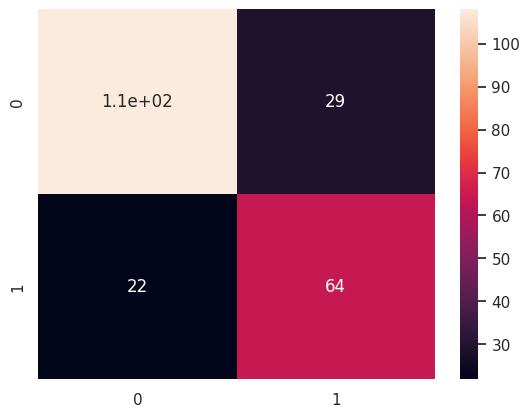

In [64]:
#XGB Classifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
print('Score: ',xgb.score(X_test,Y_test))
xgbpred = model.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,xgbpred),annot=True)